## Simple Sine Data


In [3]:
# Modified cell for dataset creation with influential exogenous variables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Parameters
n_timesteps = 365  # One year
trend_slope = 0.05  # Upward trend
seasonal_amplitude = 3
seasonal_period = 30  # Monthly seasonality
noise_std = 0.3
np.random.seed(42)  # For reproducibility

# Create time index
dates = pd.date_range('2020-01-01', periods=n_timesteps, freq='D')

# Generate base components
time_numeric = np.arange(n_timesteps)
trend = 10 + trend_slope * time_numeric
seasonality = seasonal_amplitude * np.sin(2 * np.pi * time_numeric / seasonal_period)

# Create exogenous variables first
# 1. Temperature (with seasonal pattern)
temp_seasonal = 15 + 10 * np.sin(2 * np.pi * time_numeric / 365 + np.pi)  # Opposite phase of seasonality
temp_noise = np.random.randn(n_timesteps) * 2
temperature = temp_seasonal + temp_noise

# 2. Calendar features
day_of_week = dates.dayofweek  # 0=Monday, 6=Sunday
is_weekend = (day_of_week >= 5).astype(int)
month = dates.month
day_of_week_sin = np.sin(2 * np.pi * day_of_week / 7)
day_of_week_cos = np.cos(2 * np.pi * day_of_week / 7)
day_of_month_sin = np.sin(2 * np.pi * dates.day / 30)
day_of_month_cos = np.cos(2 * np.pi * dates.day / 30)
month_sin = np.sin(2 * np.pi * month / 12)
month_cos = np.cos(2 * np.pi * month / 12)

# 3. Holidays (random holidays + fixed major holidays)
is_holiday = np.zeros(n_timesteps)
# Major holidays (approximate dates for demonstration)
major_holidays = [0, 31, 59, 120, 185, 245, 335, 358]  # Approx: Jan 1, Feb 1, Mar 1, May 1, Jul 5, Sep 2, Dec 1, Dec 24
for day in major_holidays:
    if day < n_timesteps:
        is_holiday[day] = 1

# Add some random holidays
random_holidays = np.random.choice(range(n_timesteps), size=10, replace=False)
is_holiday[random_holidays] = 1

# 4. Special event (e.g., promotion period)
is_promotion = np.zeros(n_timesteps)
promotion_periods = [(60, 75), (180, 195), (300, 315)]  # Three promotion periods
for start, end in promotion_periods:
    is_promotion[start:end] = 1

# Now make the target variable influenced by exogenous variables
# Temperature effect: higher temperature reduces the value
temp_effect = -0.2 * (temperature - 15)  # Normalized effect

# Weekend effect: weekends have different patterns
weekend_effect = 2.0 * is_weekend

# Holiday effect: holidays cause spikes
holiday_effect = 5.0 * is_holiday

# Promotion effect: promotions cause significant increases
promotion_effect = 8.0 * is_promotion

# Combine all effects with base components
exog_effects = temp_effect + weekend_effect + holiday_effect + promotion_effect
noise = np.random.randn(n_timesteps) * noise_std

# Final time series
values = trend + seasonality + exog_effects + noise

# Create DataFrame with target and components
df = pd.DataFrame({
    'value': values,
    'trend': trend,
    'seasonality': seasonality,
    'exog_effects': exog_effects,
    'noise': noise,
    'temperature': temperature,
    'is_weekend': is_weekend,
    'is_holiday': is_holiday,
    'is_promotion': is_promotion,
    'day_of_week_sin': day_of_week_sin,
    'day_of_week_cos': day_of_week_cos,
    'day_of_month_sin': day_of_month_sin,
    'day_of_month_cos': day_of_month_cos,
    'month_sin': month_sin,
    'month_cos': month_cos
}, index=dates)

# Display the first few rows
df.head()

,value,trend,seasonality,exog_effects,noise,temperature,is_weekend,is_holiday,is_promotion,day_of_week_sin,day_of_week_cos,day_of_month_sin,day_of_month_cos,month_sin,month_cos
2020-01-01,14.680948,10.00,0.000000,4.801314,-0.120366,15.993428,0,1.0,0.0,0.974928,-0.222521,0.207912,0.978148,0.5,0.866025
2020-01-02,10.909881,10.05,0.623735,0.089732,0.146413,14.551338,0,0.0,0.0,0.433884,-0.900969,0.406737,0.913545,0.5,0.866025
2020-01-03,11.604018,10.10,1.220210,-0.190232,0.474040,15.951161,0,0.0,0.0,-0.433884,-0.900969,0.587785,0.809017,0.5,0.866025
2020-01-04,13.371428,10.15,1.763356,1.494027,-0.035955,17.529863,1,0.0,0.0,-0.974928,-0.222521,0.743145,0.669131,0.5,0.866025
2020-01-05,14.694820,10.20,2.229434,2.231266,0.034119,13.843669,1,0.0,0.0,-0.781831,0.623490,0.866025,0.500000,0.5,0.866025


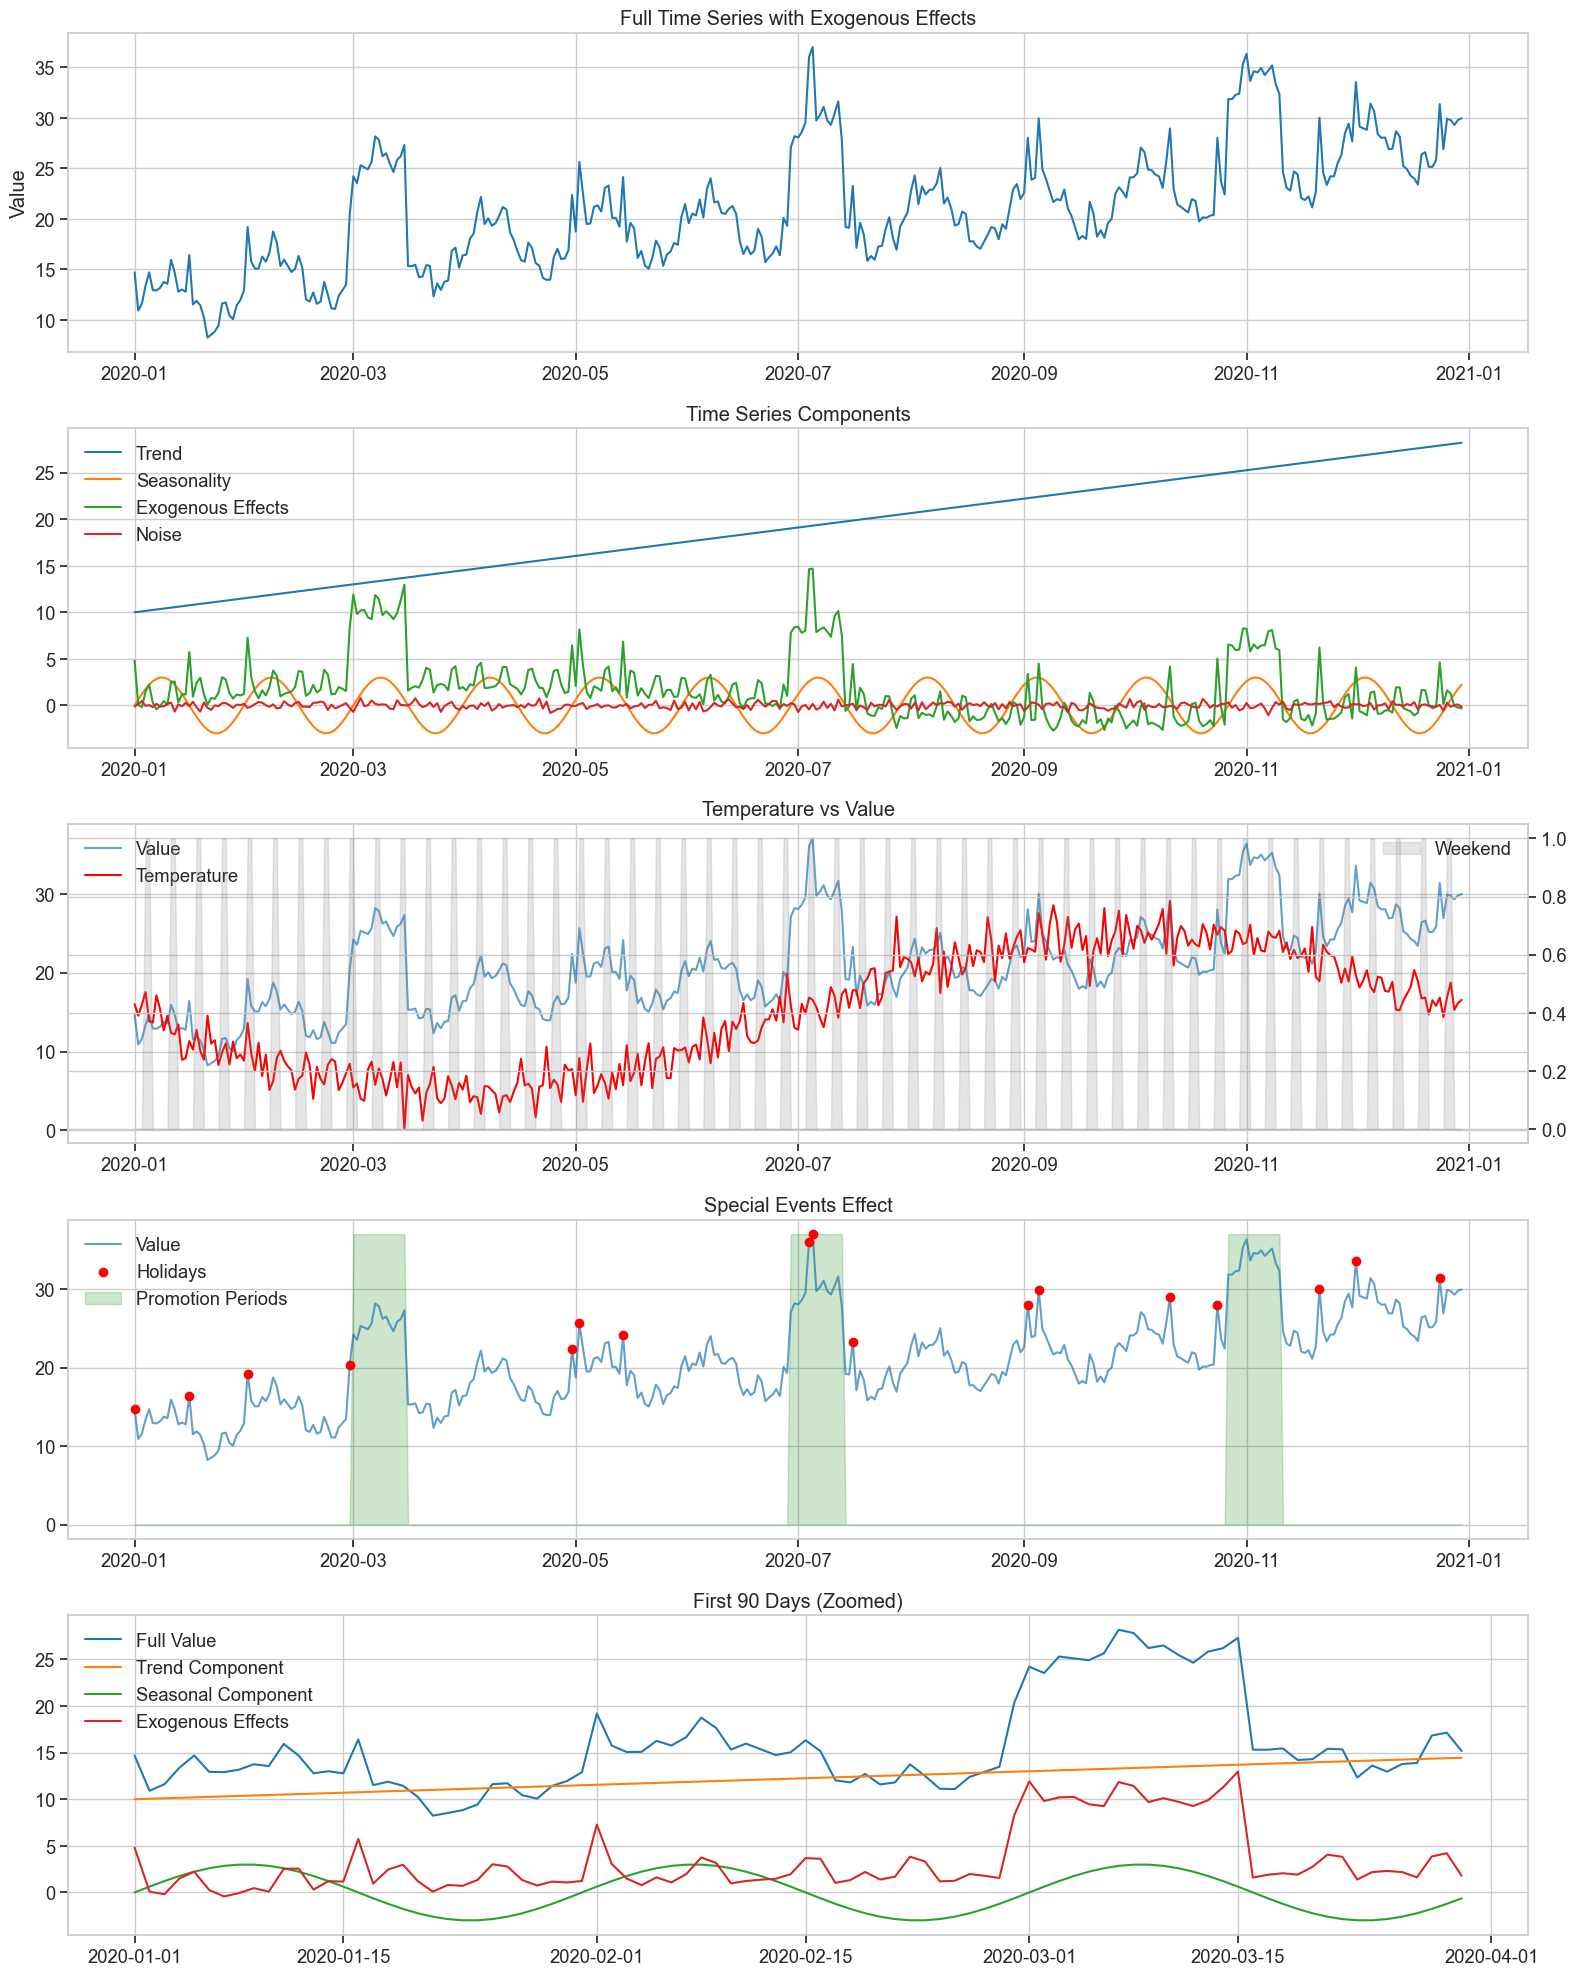

In [4]:
# Plot the data with exogenous variable effects
plt.figure(figsize=(16, 20))

# Plot 1: Full time series
plt.subplot(5, 1, 1)
plt.plot(df.index, df['value'])
plt.title('Full Time Series with Exogenous Effects')
plt.ylabel('Value')

# Plot 2: Base components
plt.subplot(5, 1, 2)
plt.plot(df.index, df['trend'], label='Trend')
plt.plot(df.index, df['seasonality'], label='Seasonality')
plt.plot(df.index, df['exog_effects'], label='Exogenous Effects')
plt.plot(df.index, df['noise'], label='Noise')
plt.title('Time Series Components')
plt.legend()

# Plot 3: Temperature effect
plt.subplot(5, 1, 3)
plt.plot(df.index, df['value'], label='Value', alpha=0.7)
plt.plot(df.index, df['temperature'], label='Temperature', color='red')
plt.title('Temperature vs Value')
plt.legend()
plt.twinx()
plt.fill_between(df.index, 0, df['is_weekend'], alpha=0.2, label='Weekend', color='gray')
plt.legend(loc='upper right')

# Plot 4: Special events
plt.subplot(5, 1, 4)
plt.plot(df.index, df['value'], label='Value', alpha=0.7)
plt.scatter(df.index[df['is_holiday'] == 1], 
           df['value'][df['is_holiday'] == 1], 
           color='red', label='Holidays', zorder=5)
plt.fill_between(df.index, 0, df['is_promotion'] * max(df['value']), 
                alpha=0.2, label='Promotion Periods', color='green')
plt.title('Special Events Effect')
plt.legend()

# Plot 5: Zoomed in view (first 90 days)
plt.subplot(5, 1, 5)
plt.plot(df.index[:90], df['value'][:90], label='Full Value')
plt.plot(df.index[:90], df['trend'][:90], label='Trend Component')
plt.plot(df.index[:90], df['seasonality'][:90], label='Seasonal Component')
plt.plot(df.index[:90], df['exog_effects'][:90], label='Exogenous Effects')
plt.title('First 90 Days (Zoomed)')
plt.legend()

plt.tight_layout()
plt.show()

Epoch [5/50], Loss: 0.0221
Epoch [10/50], Loss: 0.0168
Epoch [15/50], Loss: 0.0081
Epoch [20/50], Loss: 0.0080
Epoch [25/50], Loss: 0.0074
Epoch [30/50], Loss: 0.0071
Epoch [35/50], Loss: 0.0064
Epoch [40/50], Loss: 0.0063
Epoch [45/50], Loss: 0.0060
Epoch [50/50], Loss: 0.0061
Training completed in 3.97 seconds

LSTM Performance Metrics:
Test MSE: 6.4321
Test RMSE: 2.5362
Test MAE: 1.8678
Inference time: 0.0103 seconds


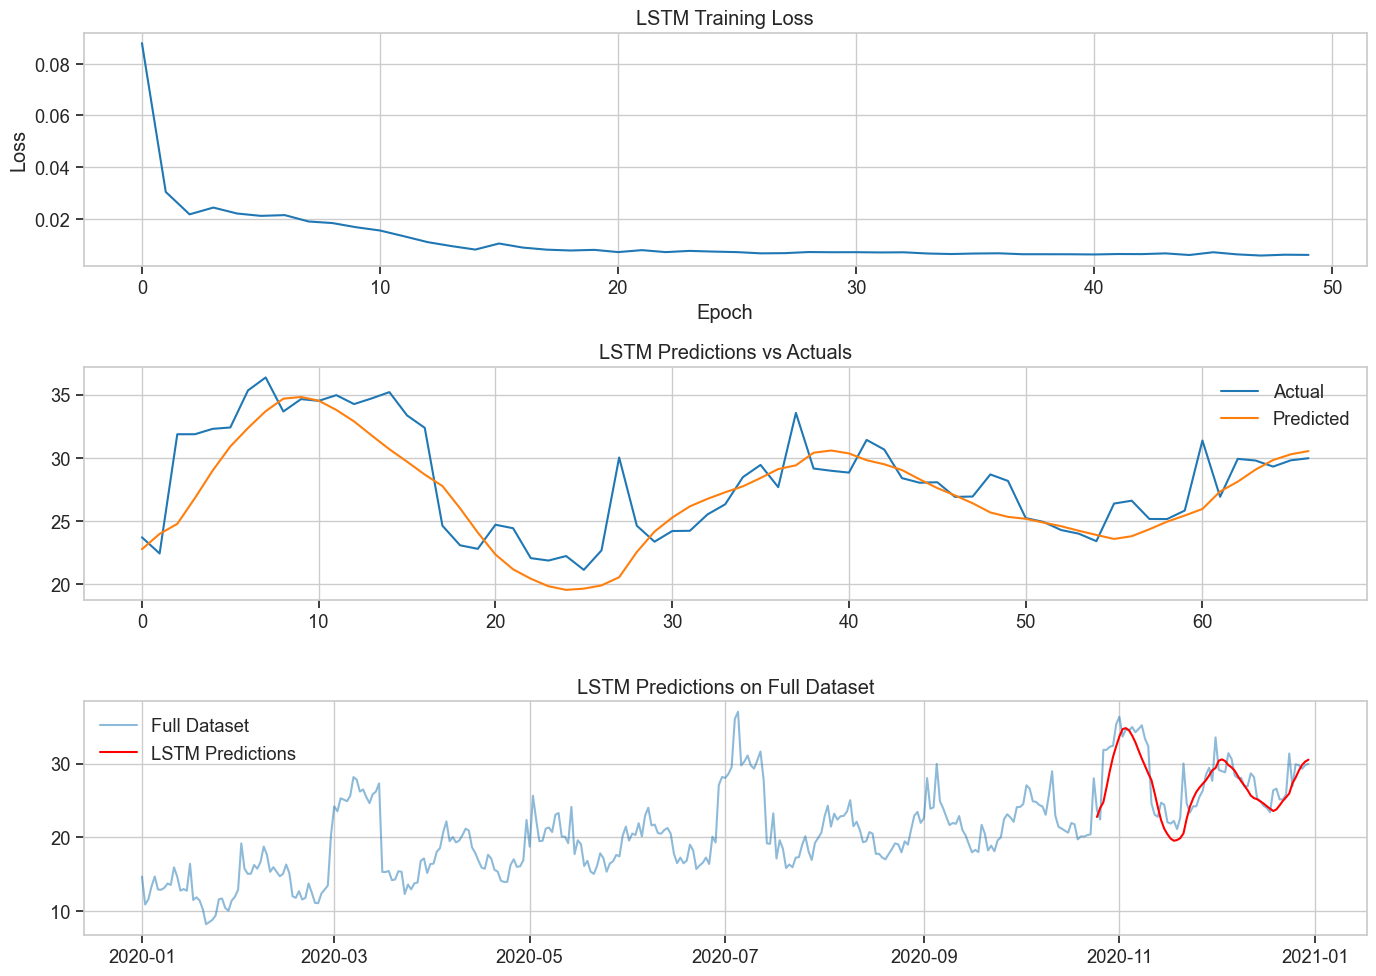

In [5]:
# Import necessary libraries for training
import torch.optim as optim
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
from models.lstm import LSTMModel

# Create sequences function
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Parameters
sequence_length = 30  # Use 30 days of history to predict the next day
lookforward = 7  # Predict 7 days ahead (for multi-step forecasting)
test_ratio = 0.2  # 20% test split

# Scale the data
lstm_scaler = MinMaxScaler()
lstm_values_scaled = lstm_scaler.fit_transform(df[['value']].values)

# Create sequences
lstm_X, lstm_y = create_sequences(lstm_values_scaled, sequence_length)

# Split into train and test sets
lstm_test_size = int(len(lstm_X) * test_ratio)
lstm_train_size = len(lstm_X) - lstm_test_size
lstm_X_train, lstm_X_test = lstm_X[:lstm_train_size], lstm_X[lstm_train_size:]
lstm_y_train, lstm_y_test = lstm_y[:lstm_train_size], lstm_y[lstm_train_size:]

# Convert to PyTorch tensors
lstm_X_train = torch.FloatTensor(lstm_X_train)
lstm_y_train = torch.FloatTensor(lstm_y_train)
lstm_X_test = torch.FloatTensor(lstm_X_test)
lstm_y_test = torch.FloatTensor(lstm_y_test)

# Create data loaders
batch_size = 32
lstm_train_dataset = TensorDataset(lstm_X_train, lstm_y_train)
lstm_test_dataset = TensorDataset(lstm_X_test, lstm_y_test)
lstm_train_loader = DataLoader(lstm_train_dataset, batch_size=batch_size, shuffle=True)
lstm_test_loader = DataLoader(lstm_test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss function, and optimizer
input_size = 1  # Single feature (value)
lstm_model = LSTMModel(input_size=input_size, hidden_size=64, num_layers=2)
lstm_criterion = nn.MSELoss()
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

# Training
num_epochs = 50
lstm_train_losses = []
lstm_start_time = time.time()

for epoch in range(num_epochs):
    lstm_model.train()
    lstm_running_loss = 0.0
    
    for inputs, targets in lstm_train_loader:
        # Forward pass
        lstm_outputs = lstm_model(inputs)
        lstm_loss = lstm_criterion(lstm_outputs, targets)
        
        # Backward and optimize
        lstm_optimizer.zero_grad()
        lstm_loss.backward()
        lstm_optimizer.step()
        
        lstm_running_loss += lstm_loss.item()
    
    lstm_avg_loss = lstm_running_loss / len(lstm_train_loader)
    lstm_train_losses.append(lstm_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {lstm_avg_loss:.4f}')

lstm_training_time = time.time() - lstm_start_time
print(f"Training completed in {lstm_training_time:.2f} seconds")

# Evaluation
lstm_model.eval()
lstm_predictions = []
lstm_actuals = []
lstm_inference_start = time.time()

with torch.no_grad():
    for inputs, targets in lstm_test_loader:
        outputs = lstm_model(inputs)
        lstm_predictions.append(outputs.numpy())
        lstm_actuals.append(targets.numpy())
    
    # Concatenate batches
    lstm_predictions = np.concatenate(lstm_predictions)
    lstm_actuals = np.concatenate(lstm_actuals)
    
    # Inverse transform to original scale
    lstm_predictions = lstm_scaler.inverse_transform(lstm_predictions)
    lstm_actuals = lstm_scaler.inverse_transform(lstm_actuals)

lstm_inference_time = time.time() - lstm_inference_start

# Calculate metrics
lstm_mse = mean_squared_error(lstm_actuals, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(lstm_actuals, lstm_predictions)

print(f"\nLSTM Performance Metrics:")
print(f"Test MSE: {lstm_mse:.4f}")
print(f"Test RMSE: {lstm_rmse:.4f}")
print(f"Test MAE: {lstm_mae:.4f}")
print(f"Inference time: {lstm_inference_time:.4f} seconds")

# Plot results
plt.figure(figsize=(14, 10))

# Plot 1: Training loss
plt.subplot(3, 1, 1)
plt.plot(lstm_train_losses)
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals
plt.subplot(3, 1, 2)
plt.plot(lstm_actuals, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.title('LSTM Predictions vs Actuals')
plt.legend()

# Plot 3: Predictions in context of the original data
plt.subplot(3, 1, 3)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)
lstm_pred_dates = df.index[sequence_length + lstm_train_size:sequence_length + lstm_train_size + len(lstm_predictions)]
plt.plot(lstm_pred_dates, lstm_predictions, label='LSTM Predictions', color='red')
plt.title('LSTM Predictions on Full Dataset')
plt.legend()

plt.tight_layout()
plt.show()

# Store results for later comparison
lstm_results = {
    'model': 'LSTM',
    'mse': lstm_mse,
    'rmse': lstm_rmse,
    'mae': lstm_mae,
    'training_time': lstm_training_time,
    'inference_time': lstm_inference_time,
    'predictions': lstm_predictions,
    'actuals': lstm_actuals,
    'prediction_dates': lstm_pred_dates
}

Preparing data for NBEATSx model...
Input shape: (329, 30)
Target shape: (329, 7)
Exogenous shape: (329, 30, 10)
Data prepared: 264 training samples, 65 test samples
Starting training...
Epoch [5/50], Loss: 0.1377
Epoch [10/50], Loss: 0.0859
Epoch [15/50], Loss: 0.0646
Epoch [20/50], Loss: 0.0464
Epoch [25/50], Loss: 0.0374
Epoch [30/50], Loss: 0.0322
Epoch [35/50], Loss: 0.0322
Epoch [40/50], Loss: 0.0261
Epoch [45/50], Loss: 0.0249
Epoch [50/50], Loss: 0.0229
Training completed in 132.78 seconds

NBEATSx Performance Metrics:
Test MSE: 23.4813
Test RMSE: 4.8458
Test MAE: 4.0792
Training time: 132.78 seconds
Inference time: 0.8987 seconds


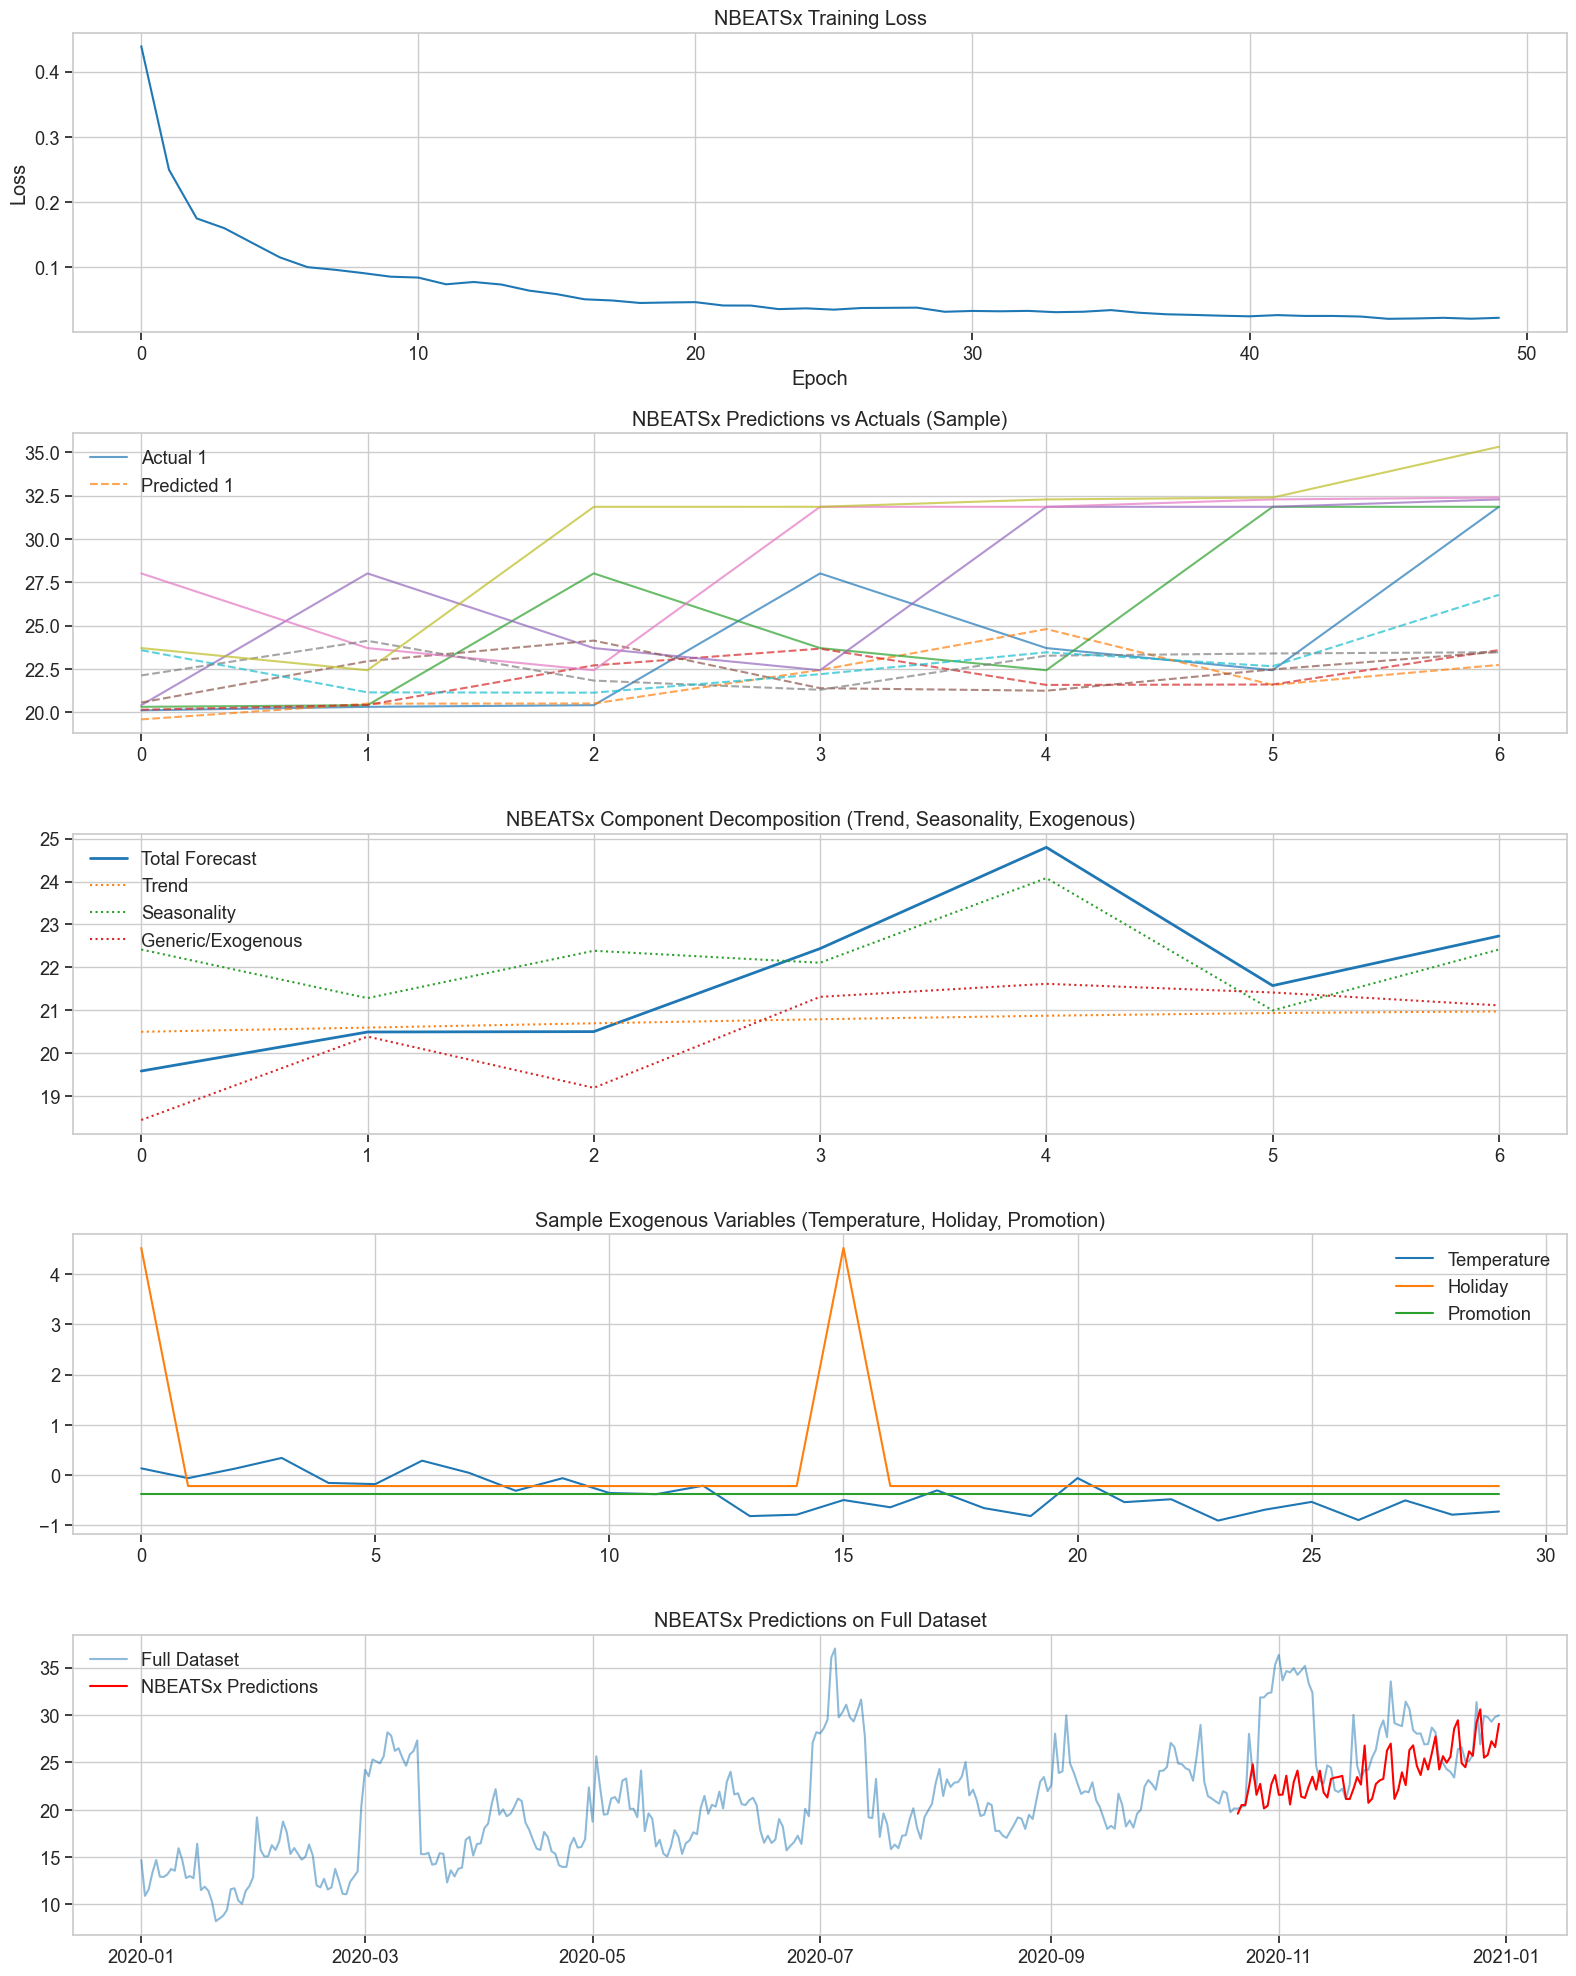


Model Comparison:
     Model        MSE      RMSE       MAE  Training Time (s)  \
0     LSTM   6.432113  2.536161  1.867775           3.971084   
1  NBEATSx  23.481333  4.845754  4.079165         132.784505   

   Inference Time (s)  
0            0.010336  
1            0.898733  

NBEATSx testing completed successfully!


In [14]:
# Import necessary libraries for training
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time
import matplotlib.pyplot as plt
from models.nbeatsx_v6 import NBEATSx


# Parameters - match LSTM test parameters for fair comparison
nbeatsx_lookback = 30  # Use 30 days of history to predict the next day
nbeatsx_forecast_horizon = 7  # Predict 7 days ahead
nbeatsx_test_ratio = 0.2

# Prepare data for NBEATSx
print("Preparing data for NBEATSx model...")

# Separate target and exogenous variables
target_col = 'value'
exog_cols = ['temperature', 'is_weekend', 'is_holiday', 'is_promotion',
             'day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin', 
             'day_of_month_cos', 'month_sin', 'month_cos']

# Scale target variable
nbeatsx_scaler_y = StandardScaler()
nbeatsx_y_scaled = nbeatsx_scaler_y.fit_transform(df[[target_col]].values)

# Scale exogenous variables
nbeatsx_scaler_x = StandardScaler()
nbeatsx_exog_scaled = nbeatsx_scaler_x.fit_transform(df[exog_cols].values)

# Create sequences with time-varying exogenous variables
def create_nbeatsx_sequences(data, exog_data, lookback, horizon):
    X, y = [], []
    exog = []
    
    for i in range(len(data) - lookback - horizon + 1):
        # Input sequence
        X.append(data[i:i+lookback, 0])
        
        # Target sequence
        y.append(data[i+lookback:i+lookback+horizon, 0])
        
        # Exogenous variables corresponding to input sequence
        exog.append(exog_data[i:i+lookback])
    
    return np.array(X), np.array(y), np.array(exog)

# Create sequences
nbeatsx_X, nbeatsx_y, nbeatsx_exog = create_nbeatsx_sequences(
    nbeatsx_y_scaled, nbeatsx_exog_scaled, nbeatsx_lookback, nbeatsx_forecast_horizon)

# Reshape exogenous variables to match expected format [batch, seq_len, features]
nbeatsx_exog = nbeatsx_exog.reshape(nbeatsx_exog.shape[0], nbeatsx_exog.shape[1], -1)

print(f"Input shape: {nbeatsx_X.shape}")
print(f"Target shape: {nbeatsx_y.shape}")
print(f"Exogenous shape: {nbeatsx_exog.shape}")

# Split into train and test sets
nbeatsx_test_size = int(len(nbeatsx_X) * nbeatsx_test_ratio)
nbeatsx_train_size = len(nbeatsx_X) - nbeatsx_test_size

nbeatsx_X_train = nbeatsx_X[:nbeatsx_train_size]
nbeatsx_y_train = nbeatsx_y[:nbeatsx_train_size]
nbeatsx_exog_train = nbeatsx_exog[:nbeatsx_train_size]

nbeatsx_X_test = nbeatsx_X[nbeatsx_train_size:]
nbeatsx_y_test = nbeatsx_y[nbeatsx_train_size:]
nbeatsx_exog_test = nbeatsx_exog[nbeatsx_train_size:]

# Convert to PyTorch tensors
nbeatsx_X_train_tensor = torch.FloatTensor(nbeatsx_X_train)
nbeatsx_y_train_tensor = torch.FloatTensor(nbeatsx_y_train)
nbeatsx_exog_train_tensor = torch.FloatTensor(nbeatsx_exog_train)

nbeatsx_X_test_tensor = torch.FloatTensor(nbeatsx_X_test)
nbeatsx_y_test_tensor = torch.FloatTensor(nbeatsx_y_test)
nbeatsx_exog_test_tensor = torch.FloatTensor(nbeatsx_exog_test)

# Create data loaders
batch_size = 32
nbeatsx_train_dataset = TensorDataset(nbeatsx_X_train_tensor, nbeatsx_y_train_tensor, nbeatsx_exog_train_tensor)
nbeatsx_test_dataset = TensorDataset(nbeatsx_X_test_tensor, nbeatsx_y_test_tensor, nbeatsx_exog_test_tensor)

nbeatsx_train_loader = DataLoader(nbeatsx_train_dataset, batch_size=batch_size, shuffle=True)
nbeatsx_test_loader = DataLoader(nbeatsx_test_dataset, batch_size=batch_size, shuffle=False)

print(f"Data prepared: {nbeatsx_train_size} training samples, {nbeatsx_test_size} test samples")

# Initialize the NBEATSx model
exog_channels = nbeatsx_exog.shape[2]  # Number of exogenous features

# Modified NBEATSx model with adjusted parameters
nbeatsx_model = NBEATSx(
    input_size=nbeatsx_lookback,
    forecast_size=nbeatsx_forecast_horizon,
    exog_channels=exog_channels,
    stack_types=['trend', 'seasonality', 'generic'],  # Try reordering these
    num_blocks_per_stack=[3, 3, 2],  # More blocks
    hidden_units=128,  # Increased from 64
    layers=3,  # Increased from 2
    trend_degree=3,
    seasonality_harmonics=7,  # Increased from 5
    dropout=0.1,
    tcn_layers=4  # Increased from 3
)

# Loss function and optimizer
nbeatsx_criterion = nn.MSELoss()
nbeatsx_optimizer = optim.Adam(nbeatsx_model.parameters(), lr=0.001)

# Training
num_epochs = 50
nbeatsx_train_losses = []
nbeatsx_start_time = time.time()

print("Starting training...")
for epoch in range(num_epochs):
    nbeatsx_model.train()
    nbeatsx_running_loss = 0.0
    
    for inputs, targets, exog in nbeatsx_train_loader:
        # Forward pass
        nbeatsx_outputs = nbeatsx_model(inputs, exog)
        nbeatsx_loss = nbeatsx_criterion(nbeatsx_outputs, targets)
        
        # Backward and optimize
        nbeatsx_optimizer.zero_grad()
        nbeatsx_loss.backward()
        nbeatsx_optimizer.step()
        
        nbeatsx_running_loss += nbeatsx_loss.item()
    
    nbeatsx_avg_loss = nbeatsx_running_loss / len(nbeatsx_train_loader)
    nbeatsx_train_losses.append(nbeatsx_avg_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {nbeatsx_avg_loss:.4f}')

nbeatsx_training_time = time.time() - nbeatsx_start_time
print(f"Training completed in {nbeatsx_training_time:.2f} seconds")

# Evaluation with component decomposition
nbeatsx_model.eval()
nbeatsx_predictions = []
nbeatsx_actuals = []
nbeatsx_components = []
nbeatsx_inference_start = time.time()

with torch.no_grad():
    for inputs, targets, exog in nbeatsx_test_loader:
        # Get prediction with component decomposition (trend, seasonality, generic)
        outputs, components = nbeatsx_model(inputs, exog, return_components=True)
        
        # Store predictions
        nbeatsx_predictions.append(outputs.numpy())
        nbeatsx_actuals.append(targets.numpy())
        
        # Store components for the first batch only (for visualization)
        if len(nbeatsx_components) == 0:
            nbeatsx_components = [comp.numpy() for comp in components]

nbeatsx_inference_time = time.time() - nbeatsx_inference_start

# Concatenate batches
nbeatsx_predictions = np.concatenate(nbeatsx_predictions)
nbeatsx_actuals = np.concatenate(nbeatsx_actuals)

# Inverse transform to original scale
nbeatsx_predictions_orig = nbeatsx_scaler_y.inverse_transform(nbeatsx_predictions.reshape(-1, 1)).reshape(nbeatsx_predictions.shape)
nbeatsx_actuals_orig = nbeatsx_scaler_y.inverse_transform(nbeatsx_actuals.reshape(-1, 1)).reshape(nbeatsx_actuals.shape)

# For the first sample, inverse transform components for visualization
nbeatsx_components_orig = []
for comp in nbeatsx_components:
    # Take just the first sample
    comp_sample = comp[0].reshape(-1, 1)
    # Inverse transform
    comp_orig = nbeatsx_scaler_y.inverse_transform(comp_sample).flatten()
    nbeatsx_components_orig.append(comp_orig)

# Calculate metrics
nbeatsx_mse = mean_squared_error(nbeatsx_actuals_orig.reshape(-1), nbeatsx_predictions_orig.reshape(-1))
nbeatsx_rmse = np.sqrt(nbeatsx_mse)
nbeatsx_mae = mean_absolute_error(nbeatsx_actuals_orig.reshape(-1), nbeatsx_predictions_orig.reshape(-1))

print(f"\nNBEATSx Performance Metrics:")
print(f"Test MSE: {nbeatsx_mse:.4f}")
print(f"Test RMSE: {nbeatsx_rmse:.4f}")
print(f"Test MAE: {nbeatsx_mae:.4f}")
print(f"Training time: {nbeatsx_training_time:.2f} seconds")
print(f"Inference time: {nbeatsx_inference_time:.4f} seconds")

# Fix for the plotting error in the NBEATSx testing cell
# The error occurs because nbeatsx_predictions_orig and nbeatsx_pred_dates have different lengths

# Visualize results
fig = plt.figure(figsize=(16, 20))

# Plot 1: Training loss
plt.subplot(5, 1, 1)
plt.plot(nbeatsx_train_losses)
plt.title('NBEATSx Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot 2: Predictions vs actuals for a few samples
plt.subplot(5, 1, 2)
for i in range(min(5, len(nbeatsx_actuals_orig))):
    plt.plot(nbeatsx_actuals_orig[i], label=f'Actual {i+1}' if i == 0 else "", alpha=0.7)
    plt.plot(nbeatsx_predictions_orig[i], label=f'Predicted {i+1}' if i == 0 else "", linestyle='--', alpha=0.7)
plt.title('NBEATSx Predictions vs Actuals (Sample)')
plt.legend()

# Plot 3: Component decomposition for a single example - NBEATSx specific feature
plt.subplot(5, 1, 3)
example_idx = 0  # First example
component_labels = ['Trend', 'Seasonality', 'Generic/Exogenous']

plt.plot(nbeatsx_predictions_orig[example_idx], label='Total Forecast', linewidth=2)
for i, comp in enumerate(nbeatsx_components_orig):
    plt.plot(comp, label=component_labels[i], linestyle=':')
plt.title('NBEATSx Component Decomposition (Trend, Seasonality, Exogenous)')
plt.legend()

# Plot 4: Exogenous variable impact
plt.subplot(5, 1, 4)
plt.plot(nbeatsx_exog[0, :, 0], label='Temperature')
plt.plot(nbeatsx_exog[0, :, 2], label='Holiday')
plt.plot(nbeatsx_exog[0, :, 3], label='Promotion')
plt.title('Sample Exogenous Variables (Temperature, Holiday, Promotion)')
plt.legend()

# Plot 5: Predictions in context of the original data
plt.subplot(5, 1, 5)
plt.plot(df.index, df['value'], label='Full Dataset', alpha=0.5)

# Fix: Calculate prediction dates and make sure lengths match
# We need to be careful about dimensions since we're working with batched predictions
# The reshape(-1) flattens all predictions, but we need to ensure dates match exactly

# First, get the total number of predictions
total_pred_points = nbeatsx_predictions_orig.size

# Calculate the starting index in the dataframe
start_idx = nbeatsx_lookback + nbeatsx_train_size

# Make sure we don't go out of bounds
end_idx = min(start_idx + total_pred_points, len(df.index))

# Get the dates for the predictions we have
nbeatsx_pred_dates = df.index[start_idx:end_idx]

# Reshape predictions to match exactly with available dates
pred_to_plot = nbeatsx_predictions_orig.reshape(-1)[:len(nbeatsx_pred_dates)]

# Now plot with matching dimensions
plt.plot(nbeatsx_pred_dates, pred_to_plot, label='NBEATSx Predictions', color='red')
plt.title('NBEATSx Predictions on Full Dataset')
plt.legend()

plt.tight_layout()
plt.show()

# Store results for later comparison
nbeatsx_results = {
    'model': 'NBEATSx',
    'mse': nbeatsx_mse,
    'rmse': nbeatsx_rmse,
    'mae': nbeatsx_mae,
    'training_time': nbeatsx_training_time,
    'inference_time': nbeatsx_inference_time,
    'predictions': nbeatsx_predictions_orig,
    'actuals': nbeatsx_actuals_orig,
    'prediction_dates': nbeatsx_pred_dates,
    'components': {
        'trend': nbeatsx_components_orig[0] if len(nbeatsx_components_orig) > 0 else None,
        'seasonality': nbeatsx_components_orig[1] if len(nbeatsx_components_orig) > 1 else None,
        'generic/exogenous': nbeatsx_components_orig[2] if len(nbeatsx_components_orig) > 2 else None
    }
}

# Create a comparison with LSTM results (assuming lstm_results exists from previous cell)
try:
    comparison_df = pd.DataFrame({
        'Model': ['LSTM', 'NBEATSx'],
        'MSE': [lstm_results['mse'], nbeatsx_results['mse']],
        'RMSE': [lstm_results['rmse'], nbeatsx_results['rmse']],
        'MAE': [lstm_results['mae'], nbeatsx_results['mae']],
        'Training Time (s)': [lstm_results['training_time'], nbeatsx_results['training_time']],
        'Inference Time (s)': [lstm_results['inference_time'], nbeatsx_results['inference_time']]
    })
    print("\nModel Comparison:")
    print(comparison_df)
except NameError:
    print("\nNo LSTM results found for comparison. Run the LSTM cell first to compare models.")

print("\nNBEATSx testing completed successfully!")


-------------------- NBEATSx Performance Analysis --------------------
Predictions shape: (65, 7)
Actuals shape: (65, 7)

Statistical Summary:
    Metric  Predictions    Actuals
0     Mean    23.925997  27.958773
1  Std Dev     2.679070   4.196318
2      Min    19.252981  20.105663
3      25%    21.988121  24.421316
4   Median    23.457655  28.013021
5      75%    25.322685  31.408434
6      Max    33.043499  36.348846

Performance Metrics:
  Metric      Value
0    MSE  23.481333
1   RMSE   4.845754
2    MAE   4.079165
3     R²  -0.333478

Error Analysis:
       Metric      Value
0  Mean Error  -4.032774
1   Std Error   2.686646
2   Min Error -10.730436
3   Max Error   1.616707


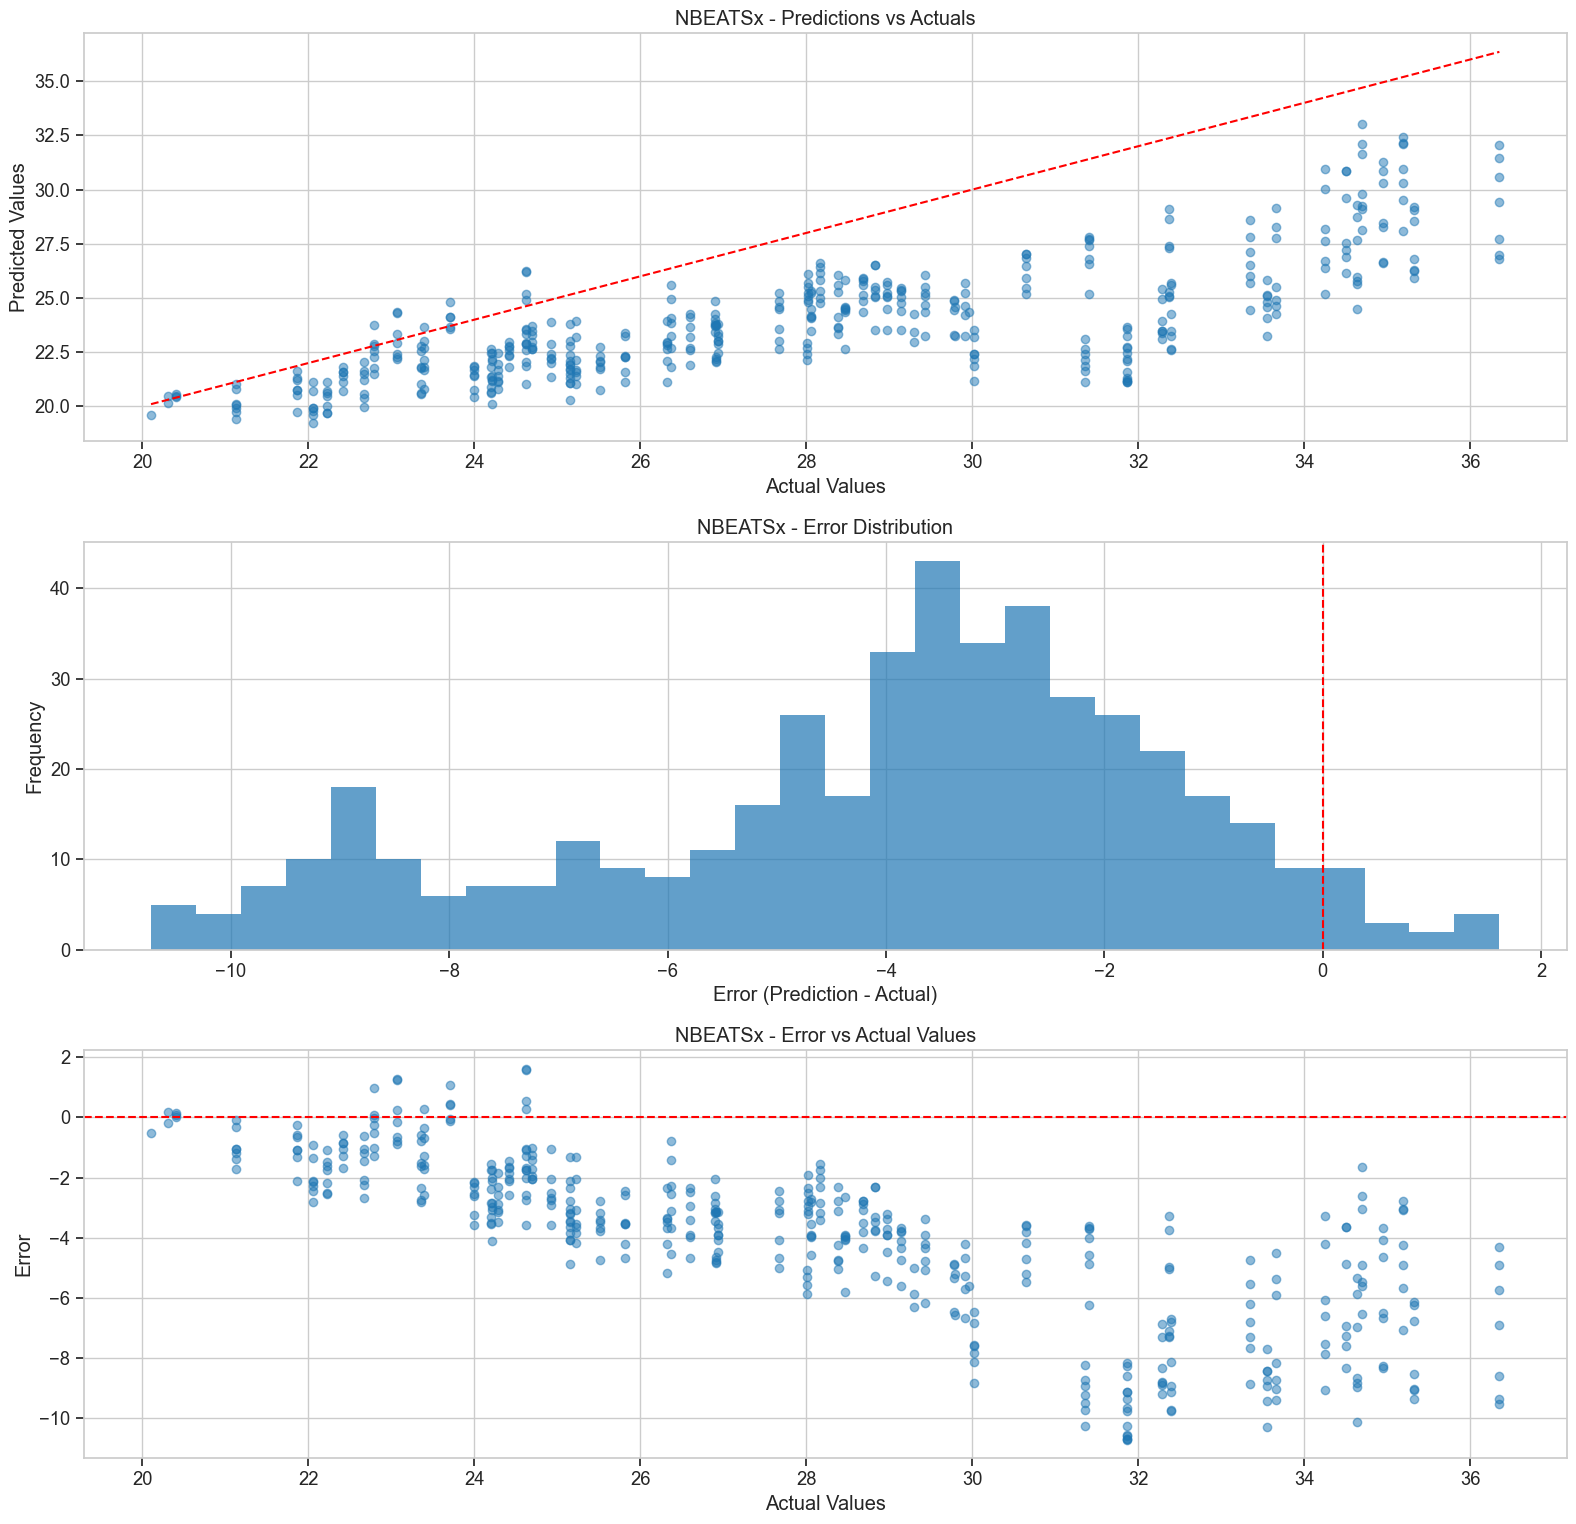


Potential Issues:
1. High bias (large mean error)
2. Low R² score (-0.33) - model explains less than 50% of variance

Possible Improvements:
1. Check if data preprocessing (scaling, etc.) is applied consistently
2. Ensure proper tracking of the forecast horizon matches between training and prediction
3. Verify that exogenous variables are properly aligned with target data
4. Examine if TCN hyperparameters (kernel size, dilations) are capturing right temporal dependencies
5. Consider increasing model capacity (hidden units or layers) if underfitting
6. Try different component configurations or stack arrangements
7. Check for data leakage or alignment issues between training and testing sets

-------------------- LSTM Performance Analysis --------------------
Predictions shape: (67, 1)
Actuals shape: (67, 1)

Statistical Summary:
    Metric  Predictions    Actuals
0     Mean    27.006212  28.100367
1  Std Dev     3.861497   4.074590
2      Min    19.545141  21.127895
3      25%    24.28

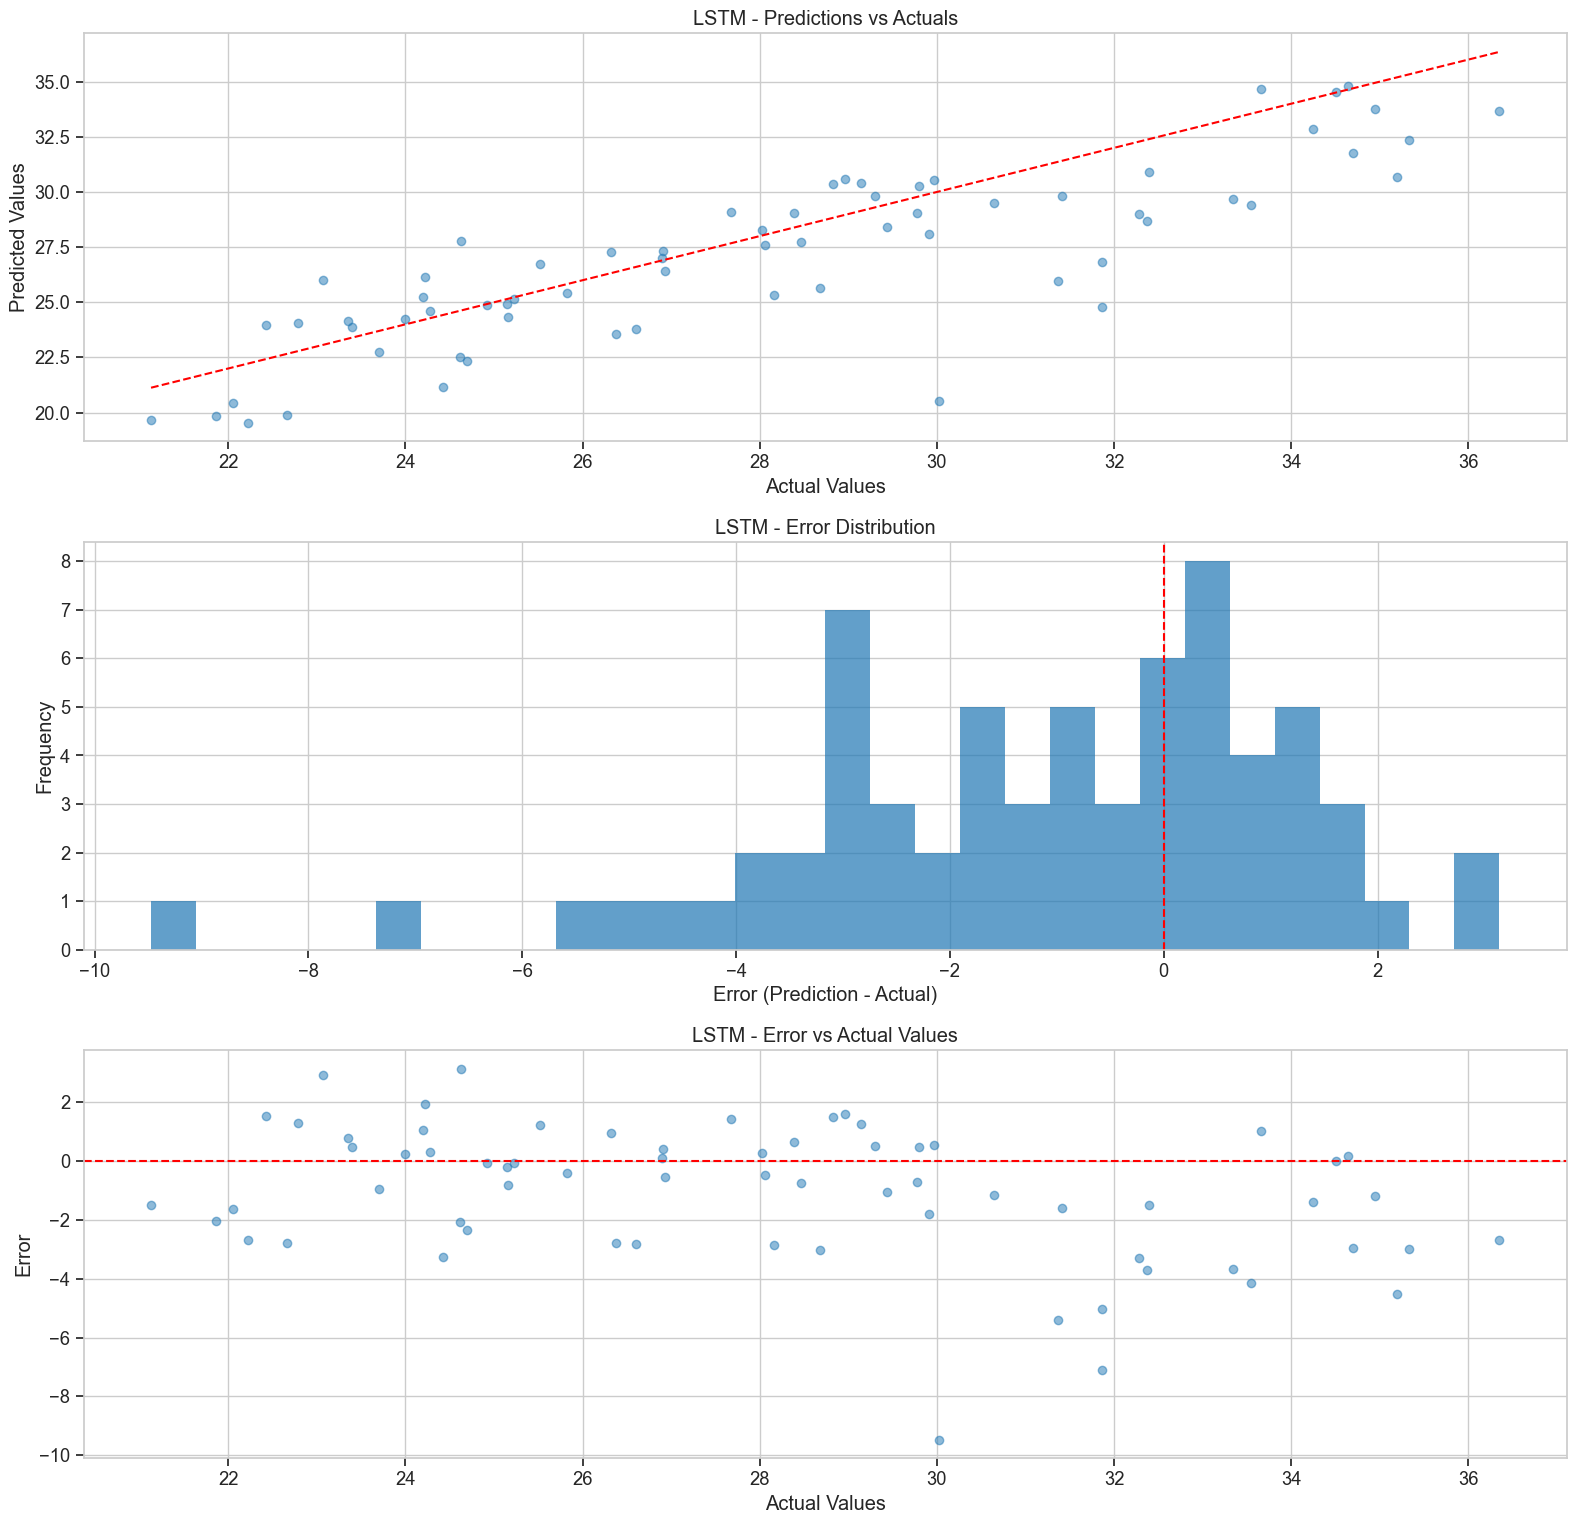


Potential Issues:
No major issues detected based on high-level metrics.

Possible Improvements:
1. Check if data preprocessing (scaling, etc.) is applied consistently
2. Ensure proper tracking of the forecast horizon matches between training and prediction
3. Verify that exogenous variables are properly aligned with target data
4. Examine if TCN hyperparameters (kernel size, dilations) are capturing right temporal dependencies
5. Consider increasing model capacity (hidden units or layers) if underfitting
6. Try different component configurations or stack arrangements
7. Check for data leakage or alignment issues between training and testing sets

Direct Model Comparison:
     Model        MSE      RMSE       MAE        R²  Training Time (s)  \
0     LSTM   6.432113  2.536161  1.867775  0.612577           3.971084   
1  NBEATSx  23.481333  4.845754  4.079165 -0.333478         132.784505   

   Inference Time (s)  
0            0.010336  
1            0.898733  

Sample of first 10 pred

In [15]:
# Diagnostic analysis for NBEATSx predictions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a function to analyze and visualize model performance
def analyze_model_performance(model_name, predictions, actuals, dates=None, components=None):
    print(f"\n{'-'*20} {model_name} Performance Analysis {'-'*20}")
    
    # 1. Basic shape analysis
    print(f"Predictions shape: {predictions.shape}")
    print(f"Actuals shape: {actuals.shape}")
    
    # 2. Statistical summary
    pred_flat = predictions.reshape(-1)
    act_flat = actuals.reshape(-1)
    
    stats_df = pd.DataFrame({
        'Metric': ['Mean', 'Std Dev', 'Min', '25%', 'Median', '75%', 'Max'],
        'Predictions': [
            np.mean(pred_flat),
            np.std(pred_flat),
            np.min(pred_flat),
            np.percentile(pred_flat, 25),
            np.median(pred_flat),
            np.percentile(pred_flat, 75),
            np.max(pred_flat)
        ],
        'Actuals': [
            np.mean(act_flat),
            np.std(act_flat),
            np.min(act_flat),
            np.percentile(act_flat, 25),
            np.median(act_flat),
            np.percentile(act_flat, 75),
            np.max(act_flat)
        ]
    })
    
    print("\nStatistical Summary:")
    print(stats_df)
    
    # 3. Performance metrics
    print("\nPerformance Metrics:")
    mse = mean_squared_error(act_flat, pred_flat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(act_flat, pred_flat)
    r2 = r2_score(act_flat, pred_flat)
    
    metrics_df = pd.DataFrame({
        'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
        'Value': [mse, rmse, mae, r2]
    })
    print(metrics_df)
    
    # 4. Error analysis
    errors = pred_flat - act_flat
    
    error_stats = pd.DataFrame({
        'Metric': ['Mean Error', 'Std Error', 'Min Error', 'Max Error'],
        'Value': [
            np.mean(errors),
            np.std(errors),
            np.min(errors),
            np.max(errors)
        ]
    })
    print("\nError Analysis:")
    print(error_stats)
    
    # 5. Visualizations
    plt.figure(figsize=(16, 20))
    
    # 5.1 Predictions vs Actuals Scatter
    plt.subplot(4, 1, 1)
    plt.scatter(act_flat, pred_flat, alpha=0.5)
    plt.plot([min(act_flat), max(act_flat)], [min(act_flat), max(act_flat)], 'r--')
    plt.title(f'{model_name} - Predictions vs Actuals')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    
    # 5.2 Error Distribution
    plt.subplot(4, 1, 2)
    plt.hist(errors, bins=30, alpha=0.7)
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title(f'{model_name} - Error Distribution')
    plt.xlabel('Error (Prediction - Actual)')
    plt.ylabel('Frequency')
    
    # 5.3 Error vs Actuals
    plt.subplot(4, 1, 3)
    plt.scatter(act_flat, errors, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'{model_name} - Error vs Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Error')
    
    # 5.4 Sample Time Series Comparison
    if dates is not None:
        # Plot first few samples in time series format
        plt.subplot(4, 1, 4)
        
        # Take a subset of samples for clarity
        sample_idx = 0
        
        if len(predictions.shape) > 1:
            # For multi-step forecasts
            horizon = predictions.shape[1]
            plt.plot(range(horizon), actuals[sample_idx], label='Actual', marker='o')
            plt.plot(range(horizon), predictions[sample_idx], label='Predicted', marker='x')
            
            # Plot components if available
            if components is not None and len(components) > 0:
                for i, (name, comp) in enumerate(components.items()):
                    if comp is not None:
                        plt.plot(range(horizon), comp, label=name, linestyle='--')
        else:
            # For single-step forecasts
            plt.plot(actuals, label='Actual', marker='o')
            plt.plot(predictions, label='Predicted', marker='x')
        
        plt.title(f'{model_name} - Sample Forecast Comparison')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # 6. Check for issues
    issues = []
    
    if abs(np.mean(errors)) > 0.5 * np.std(act_flat):
        issues.append("High bias (large mean error)")
    
    if np.std(pred_flat) < 0.5 * np.std(act_flat):
        issues.append("Model predictions have much lower variance than actuals")
    
    if np.std(pred_flat) > 1.5 * np.std(act_flat):
        issues.append("Model predictions have much higher variance than actuals")
    
    if r2 < 0.5:
        issues.append(f"Low R² score ({r2:.2f}) - model explains less than 50% of variance")
    
    if abs(np.min(pred_flat) - np.min(act_flat)) > 0.5 * (np.max(act_flat) - np.min(act_flat)):
        issues.append("Model doesn't capture minimum values well")
        
    if abs(np.max(pred_flat) - np.max(act_flat)) > 0.5 * (np.max(act_flat) - np.min(act_flat)):
        issues.append("Model doesn't capture maximum values well")
    
    print("\nPotential Issues:")
    if issues:
        for i, issue in enumerate(issues):
            print(f"{i+1}. {issue}")
    else:
        print("No major issues detected based on high-level metrics.")
    
    # 7. Suggest improvements
    print("\nPossible Improvements:")
    print("1. Check if data preprocessing (scaling, etc.) is applied consistently")
    print("2. Ensure proper tracking of the forecast horizon matches between training and prediction")
    print("3. Verify that exogenous variables are properly aligned with target data")
    print("4. Examine if TCN hyperparameters (kernel size, dilations) are capturing right temporal dependencies")
    print("5. Consider increasing model capacity (hidden units or layers) if underfitting")
    print("6. Try different component configurations or stack arrangements")
    print("7. Check for data leakage or alignment issues between training and testing sets")

# Run diagnostics on NBEATSx predictions
analyze_model_performance(
    model_name="NBEATSx",
    predictions=nbeatsx_predictions_orig,
    actuals=nbeatsx_actuals_orig,
    components={
        'Trend': nbeatsx_components_orig[0] if len(nbeatsx_components_orig) > 0 else None,
        'Seasonality': nbeatsx_components_orig[1] if len(nbeatsx_components_orig) > 1 else None,
        'Generic': nbeatsx_components_orig[2] if len(nbeatsx_components_orig) > 2 else None
    }
)

# If lstm_results is available, also analyze LSTM for comparison
try:
    analyze_model_performance(
        model_name="LSTM",
        predictions=lstm_results['predictions'],
        actuals=lstm_results['actuals']
    )
    
    # Print direct comparison of key metrics
    print("\n" + "="*50)
    print("Direct Model Comparison:")
    comparison_df = pd.DataFrame({
        'Model': ['LSTM', 'NBEATSx'],
        'MSE': [lstm_results['mse'], nbeatsx_results['mse']],
        'RMSE': [lstm_results['rmse'], nbeatsx_results['rmse']],
        'MAE': [lstm_results['mae'], nbeatsx_results['mae']],
        'R²': [r2_score(lstm_results['actuals'].reshape(-1), lstm_results['predictions'].reshape(-1)),
               r2_score(nbeatsx_actuals_orig.reshape(-1), nbeatsx_predictions_orig.reshape(-1))],
        'Training Time (s)': [lstm_results['training_time'], nbeatsx_results['training_time']],
        'Inference Time (s)': [lstm_results['inference_time'], nbeatsx_results['inference_time']]
    })
    print(comparison_df)
except NameError:
    print("\nLSTM results not available for comparison.")

# Additional diagnostic: Check the first few values directly
print("\nSample of first 10 predictions vs actuals:")
sample_df = pd.DataFrame({
    'Actual': nbeatsx_actuals_orig.reshape(-1)[:10],
    'Predicted': nbeatsx_predictions_orig.reshape(-1)[:10],
    'Error': nbeatsx_predictions_orig.reshape(-1)[:10] - nbeatsx_actuals_orig.reshape(-1)[:10]
})
print(sample_df)

# Check data scaling
print("\nData Scaling Check:")
print(f"Original data mean: {df['value'].mean():.4f}, std: {df['value'].std():.4f}")
print(f"Scaled data mean: {nbeatsx_y_scaled.mean():.4f}, std: {nbeatsx_y_scaled.std():.4f}")
print(f"Predictions mean after inverse transform: {nbeatsx_predictions_orig.mean():.4f}, std: {nbeatsx_predictions_orig.std():.4f}")
print(f"Actuals mean after inverse transform: {nbeatsx_actuals_orig.mean():.4f}, std: {nbeatsx_actuals_orig.std():.4f}")

# Check for any NaN or infinite values
print("\nNaN/Inf Check:")
print(f"NaN in predictions: {np.isnan(nbeatsx_predictions_orig).any()}")
print(f"Inf in predictions: {np.isinf(nbeatsx_predictions_orig).any()}")
print(f"NaN in actuals: {np.isnan(nbeatsx_actuals_orig).any()}")
print(f"Inf in actuals: {np.isinf(nbeatsx_actuals_orig).any()}")

|